In [27]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cvxpy as cp

WDBC = datasets.load_breast_cancer()
X, y = datasets.load_breast_cancer(return_X_y=True)
# Changing labels
y = 2*y - 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Normalize the features on the training set to have mean 0 and standard deviation 1
for i in range(X_train.shape[1]):
    X_train_mean = np.mean(X_train[:,i])
    X_train_std = np.std(X_train[:,i])
    X_train[:,i] = (X_train[:,i] - X_train_mean)/X_train_std
    X_test[:,i] = (X_test[:,i] - X_train_mean)/X_train_std


# variables
w = cp.Variable(X_train.shape[1])
b = cp.Variable()

# objective function
obj = cp.Minimize(cp.norm(w, 2))

# constraints
constraints = [cp.multiply(y_train, (X_train @ w + b)) >= 1]

problem = cp.Problem(obj, constraints)
problem.solve(solver = cp.SCS)
optimal_w = w.value
optimal_b = b.value

print("Optimal weights:", optimal_w)
print("Optimal beta:", optimal_b)

# get test error
pred_test = np.sign(X_test @ optimal_w + optimal_b)
miss_test = np.sum(pred_test != y_test)
test_error = miss_test / len(y_test)
print("Test error:", test_error)

# get train error
pred_train = np.sign(X_train @ optimal_w + optimal_b)
miss_train = np.sum(pred_train != y_train)
train_error = miss_train / len(y_train)
print("Train error:", train_error)


Optimal weights: [ 3.06045957 -0.09394512  0.37023925  1.70814134  0.98253091 10.98817352
 -6.10280105 -8.3171131  -1.97127393 -3.15117364 -4.7817386   2.11554894
 -0.26793539 -5.62428843  1.1345143   1.78015504  3.56552785 -5.87998786
 -0.74154819 11.18691842 -4.66443192 -4.07301054 -4.09418921 -4.72252817
 -0.42310092  1.11280508 -4.88097367  2.72812726  0.53169548 -7.24581975]
Optimal beta: -2.186134702671285
Test error: 0.055944055944055944
Train error: 0.0


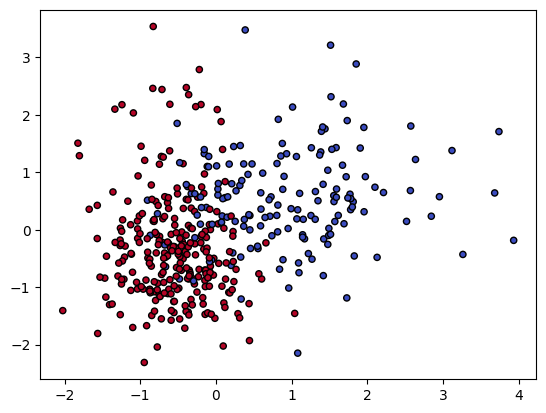

In [28]:
# 2-dimensional example
X2D_train = X_train[:,:2]
X2D_test = X_test[:,:2]

fig, ax = plt.subplots()
ax.scatter(X2D_train[:,0], X2D_train[:,1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
plt.show()

In [30]:
import cvxpy as cp

# variables
w = cp.Variable(X_train.shape[1])
b = cp.Variable()
e = cp.Variable(len(y_train))
l = 1

# objective function
obj = cp.Minimize(cp.norm(e, 1) + (l * cp.norm(w, 2)**2))

# constraints
constraints = [y_train[i] * (X_train[i] @ w + b) >= 1 - e[i] for i in range(len(y_train))]
constraints += [e >= 0]
problem = cp.Problem(objective, constraints)
problem.solve(solver = cp.SCS)

optimal_w = w.value
optimal_b = b.value
print("Optimal w:", optimal_w)
print("Optimal b:", optimal_b)

# get test error
pred_test = np.sign(X_test @ optimal_w + optimal_b)
miss_test = np.sum(pred_test != y_test)
test_error = miss_test / len(y_test)
print("Test error:", test_error)

# get train error
pred_train = np.sign(X_train @ optimal_w + optimal_b)
miss_train = np.sum(pred_train != y_train)
train_error = miss_train / len(y_train)
print("Train error:", train_error)


Optimal w: [ 1.11542287 -0.00844845 -0.74683417 -0.62514125 -0.0704233   0.46124755
 -0.4741592   0.01432258 -0.04368184  0.04424864 -0.61795848  0.05548452
  0.13837134  0.07885348 -0.02190708 -0.1250052   0.52099172 -0.1322126
 -0.03041092  0.17439856 -1.18844293 -0.18586059 -0.38948491  1.43128572
  0.00242955  0.14243623 -0.34838024 -0.1837956  -0.11004119 -0.31736937]
Optimal b: 0.2129111359129588
Test error: 0.03496503496503497
Train error: 0.025821596244131457


In [31]:
# define variables
w = cp.Variable(X2D_train.shape[1])
b = cp.Variable()

# define objecive
objective = cp.Minimize(cp.norm(w, 2))

# define constraints
constraints = [cp.multiply(y_train, X2D_train @ w + b) >= 1]
problem = cp.Problem(objective, constraints)
problem.solve()

optimal_w = w.value
optimal_b = b.value
print("Optimal w:", optimal_w)
print("Optimal b:", optimal_b)

Optimal w: None
Optimal b: None


In [33]:
# define variables
w = cp.Variable(X2D_train.shape[1])
b = cp.Variable()
e = cp.Variable(len(y_train))
l = 1

# define objective
objective = cp.Minimize(cp.norm(e, 1) + (l * cp.norm(w, 2)**2))

# define constraints 
constraints = [y_train[i] * (X2D_train[i] @ w + b) >= 1 - e[i] for i in range(len(y_train))]
constraints += [e >= 0]
problem = cp.Problem(objective, constraints)
problem.solve(solver = cp.SCS)

optimal_w = w.value
optimal_b = b.value
print("Optimal w:", optimal_w)
print("Optimal b:", optimal_b)

# test error
pred_test = np.sign(X2D_test @ optimal_w + optimal_b)
miss_test = np.sum(pred_test != y_test)
test_error = miss_test / len(y_test)
print("Test error:", test_error)

# training error
pred_train = np.sign(X2D_train @ optimal_w + optimal_b)
miss_train = np.sum(predictions != y_train)
train_error = miss_train / len(y_train)
print("Training error:", train_error)

Optimal w: [-2.10727645 -0.56402075]
Optimal b: 0.4865831175454212
Test error: 0.0979020979020979
Training error: 0.0
